# Scientific Programming in Python (SPiP) - 2D and 3D plotting with Matplotlib

by [Michael Granitzer (michael.granitzer@uni-passau.de)](http://www.mendeley.com/profiles/michael-granitzer/) 

based on the following sources

* [J.R. Johansson (robert@riken.jp)](http://dml.riken.jp/~rob/), 
  [Scientific Programming in Pyton](http://github.com/jrjohansson/scientific-python-lectures)

__License__

This work is licensed under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/)


## 1. Introduction

Matplotlib is a 2D and 3D graphics library for generating scientific figures. 

Figures are controlled *programmatically*, i.e. you can script it, ensure reproducibility and re-use.

**Advantages**

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).


More information at the Matplotlib web page: http://matplotlib.org/

## 1.1. Getting Started

In IPython notebook via magic commands

In [1]:
# ipython magic command:
# This line loads matplotlib package for ipython notebook 
# and configures matplotlib to show figures embedded in the notebook, 
# instead of poping up a new window. 
%matplotlib inline

In Python modules via import of `matplotlib` (and binding its plot object to `plt`)

In [2]:
import matplotlib.pyplot as plt

## 2. The Plotting API



### 2.1. Using mathplotlib in global namespace


* The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided by matplotlib. 

* It is designed to compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB.

* It maintains a global object against which all painting commands are done. The global object can be switched with the `figure()` function

* To use this API from matplotlib, we need to include the symbols in the `pylab` module (imports all functions in global namespace): 

#### Example - plotting a simple figure

In [5]:
# the function to plot
import numpy as np
x = np.linspace(0, 5, 10) # create a numpy array going from 0 to 5 with step size c
y = x ** 2

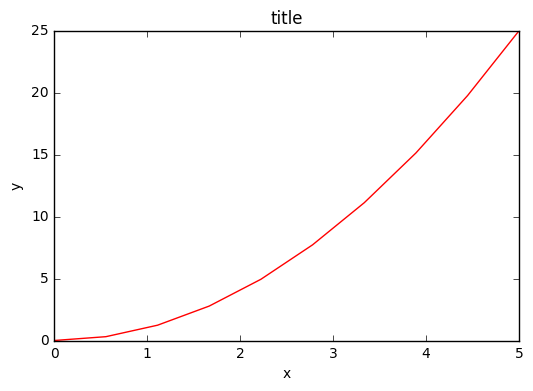

In [15]:
plt.figure() #intantiates a figure object (= canvas for drawing) with new (integer) id or loads an existing figure
plt.plot(x, y, 'r') # plot points and connect them as red lines
plt.xlabel('x') # set the x label
plt.ylabel('y') # set the y label
plt.title('title') #set the title of the figure
plt.show() # now draw the figure

#### Example 2 - creating subplots

* The plotting canvas can be split into subplots using the `subplot` command
* `subplot(nrows, ncols, plot_number)``
   * `nrows` - number of rows in the plot figure
   * `ncols` - number of cols in the plot figure
   * `plot_number`- the plot which should be activated 
      * *plot_number* starts at 1, increments across rows first an has a maximum of ``nrows * ncols``.
* see `help(subplot)` for details

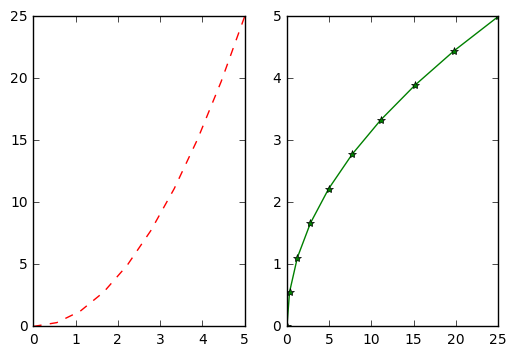

In [17]:
plt.subplot(1,2,1) # 1 row, 2 columns. select first subplot
plt.plot(x, y, 'r--') #plot in red dashed lines
plt.subplot(1,2,2) # 1 row, 2 columns. select second subplot
plt.plot(y, x, 'g*-'); #plot in green line with marking points

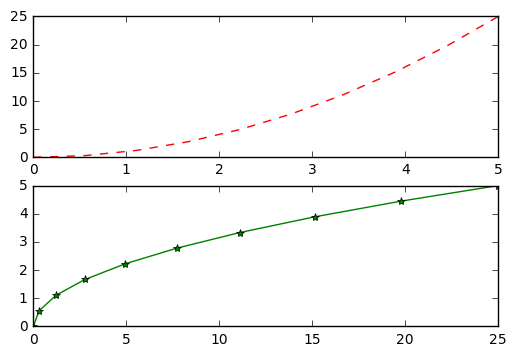

In [21]:
plt.subplot(2,1,1) # 1 row, 2 columns. select first subplot
plt.plot(x, y, 'r--') #plot in red dashed lines
plt.subplot(2,1,2) # 1 row, 2 columns. select second subplot
plt.plot(y, x, 'g*-'); #plot in green line with marking points

#### Comments on MATLAB-style API

**Pro**
* Similar to MATLAB, so easy to get started by those who know the API
* Minimum coding overhead
* Nice in interactive explorations

**Contra**
* Keep track of the state of the figure in your head
* Can become complex for larger figures
* No ojbect oriented view


### 2.2 Using mathplotlib via objects

**Design Decision **

* Every figure becomes an object
* Invoke commands against the ojbect to alter state/draw items

**Approach**
* You start by creating a figure object (instance of `Figure` class)
* A figure consists of `axes`, where new axes can be added via the `add_axes` method in the `Figure` class

#### 2.2.1 Basics

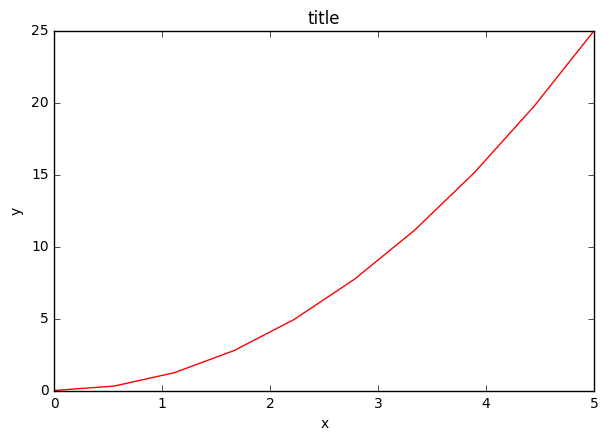

In [35]:
import matplotlib.pyplot as plt # import the plot object as factory for plots
fig = plt.figure() #create new figure object 
# create a frame within the figure by bounding it with axes
frame = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # left, bottom, width, height (range 0 to 1)
# populate the frame
frame.plot(x, y, 'r') # plot red line
frame.set_xlabel('x') # set xlabel
frame.set_ylabel('y') # set ylabel
frame.set_title('title'); # set title

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are place, and we can easily add more than one axis to the figure.

**Adding axes**

You can add axes (=sub plots) anywhere by specifying their bounding box `[left, bottom, width, height]`

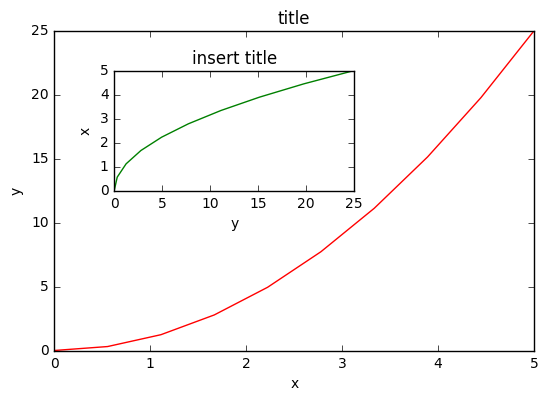

In [36]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

** Default Axes**

If we don't care to be explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. The most used one is `subplots`, which can be used like this:

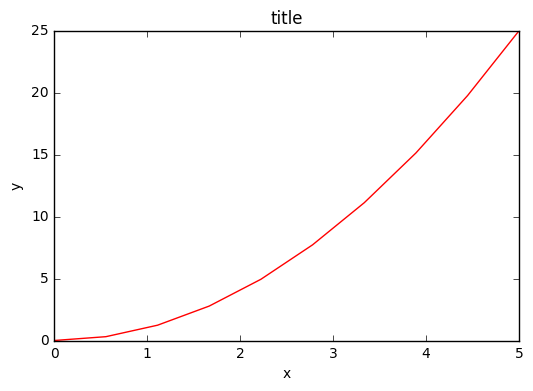

In [37]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

**Creating Subplots **

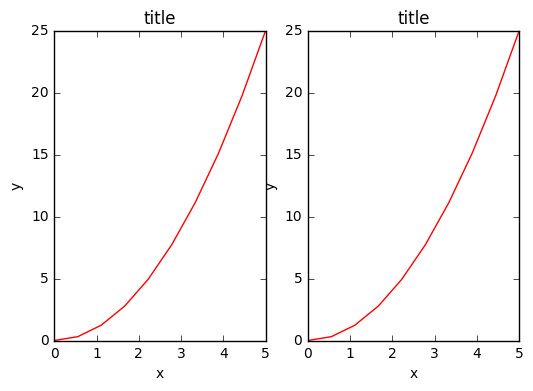

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title');

** Remove Overlapping **

* Use the `fig.tight_layout` method, to automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

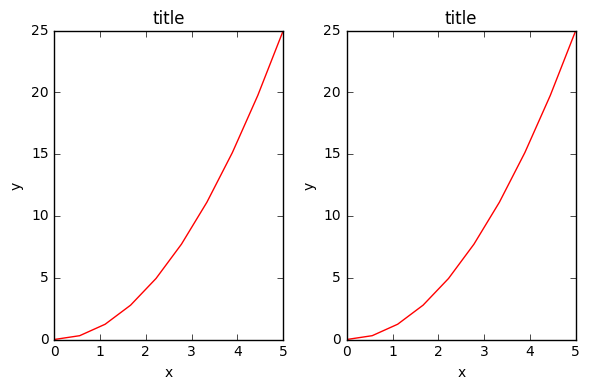

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

#### 2.2.2. Layout and Formatting

**Figure size, aspect ratio and DPI**

* Figures can have different aspect ratios and dots-per-inch (DPI)
* Set when creating `Figure` object using the `figsize` and `dpi` keyword arguments
* `figsize` is a tuple with width and height of the figure in inches,
* `dpi` is the dot-per-inch (pixel per inch). To create a figure with size 800 by 400 pixels we can do: 

In [65]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to layout managers, such as the `subplots` function.

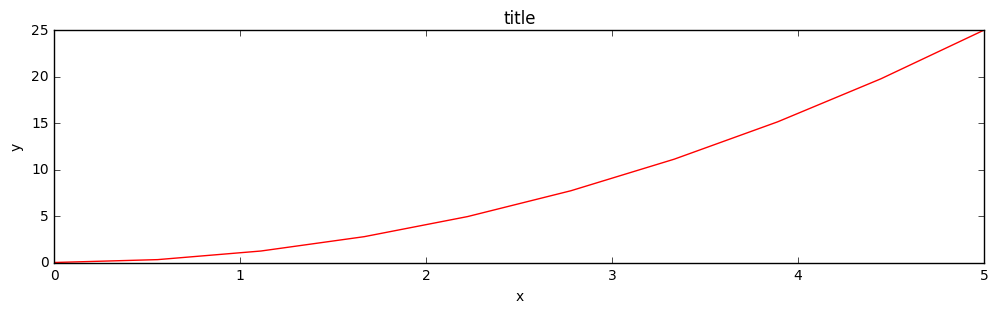

In [66]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

** Saving figures **

To save a figure a file we can use the `savefig` method in the `Figure` class. 

In [67]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI ...

In [68]:
fig.savefig("filename.png", dpi=200)

... and chose between different output formats.

In [69]:
fig.savefig("filename.svg")

### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PDF. For scientific papers, use PDF whenever possible (compile LaTeX documents with `pdflatex`, which can include PDFs using the `includegraphics` command). 

##### Legends, labels and titles

Now that we covered the basics of how to create a figure canvas and adding axes instances to the canvas, let's look at how decorate a figure with titles, axis labels and legends:

**Figure titles**

A title can be added to each axis instance in a figure. To set the title use the `set_title` method in the axes instance:

In [70]:
ax.set_title("title")

**Axis labels**

Similarly, using the methods `set_xlabel` and `set_ylabel` we can set the labels of the X and Y axes:

In [71]:
ax.set_xlabel("x")
ax.set_ylabel("y")

**Legends**

Legends to curves in a figure can be added in two ways. First method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the curves that have previously been added:

In [72]:
ax.legend(["curve1", "curve2", "curve3"]);

The method described above follow the MATLAB API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in wrong label being used for wrong curve).

A better method is to use the `label="label text"` keyword argument when plots a other objects are added to the figure, and then using the `legend` method without arguments to add the legend: 

In [73]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes and optional keywork argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some most common alternatives are:

In [74]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

##### Example - Using plots and legend
The following figure show how to use the figure title, axis labels and legends described above:

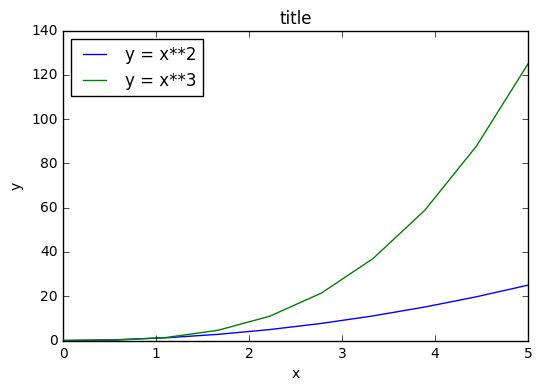

In [75]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')
ax.legend(loc=2); # upper left corner

##### Formatting text: LaTeX, fontsize, font family


* Improve text to improve readability. 
* We can use LaTeX formatted text and adjust font properties (size, font familiy, bold etc.)

**Latex Support **

* use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.
* However, we need to escape `\` for Latex commands
* Solution: use raw text strings
  * `r"String"`
  * e.g. `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`.

**Example - Formatting Layout**

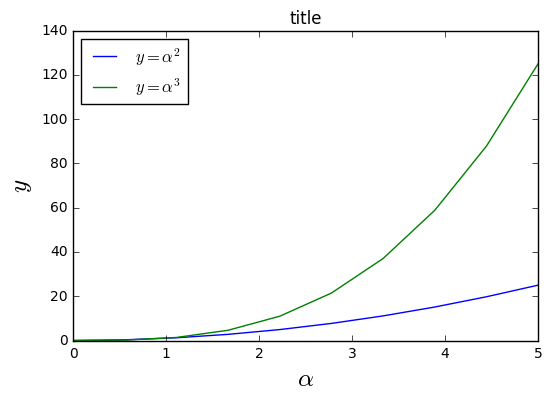

In [76]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$") # use latex equations as raw strings
ax.plot(x, x**3, label=r"$y = \alpha^3$") # use latex equations as raw strings
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title')
ax.legend(loc=2); # upper left corner

**Updateing Font Size**
We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [78]:
# Update the matplotlib configuration parameters:
import matplotlib
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

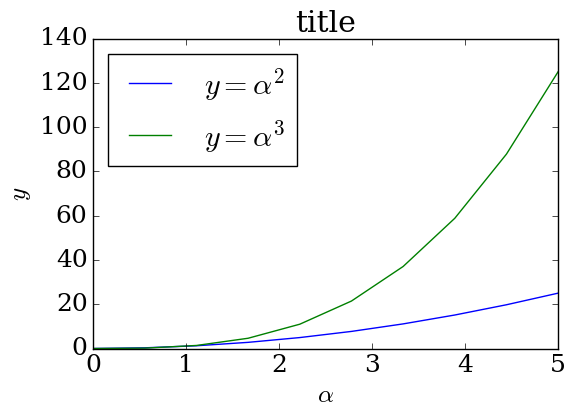

In [79]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title')
ax.legend(loc=2); # upper left corner

In [80]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans'})

##### Setting colors, linewidths, linetypes

**Colors**

Colors of lines and other graphical elements can be defined in a number of way. 

For example, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where for example 'b.-' mean a blue line with dots.

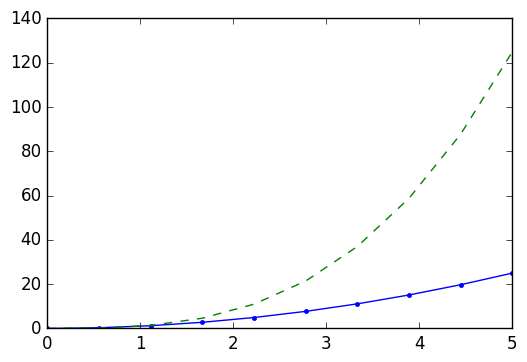

In [81]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

In matplotlib we can also define colors by their name or RGB hex codes, and optionally provide an alpha value, using the `color` and `alpha` keyword arguments:

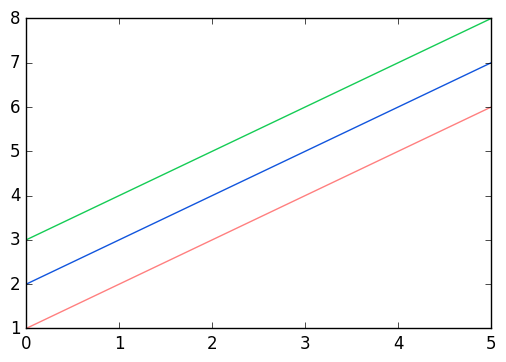

In [82]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

**Line and marker styles** 

To change the line width we can use the `linewidth` or `lw` keyword argument, and the line style can be selected using the `linestyle` or `ls` keyword arguments:

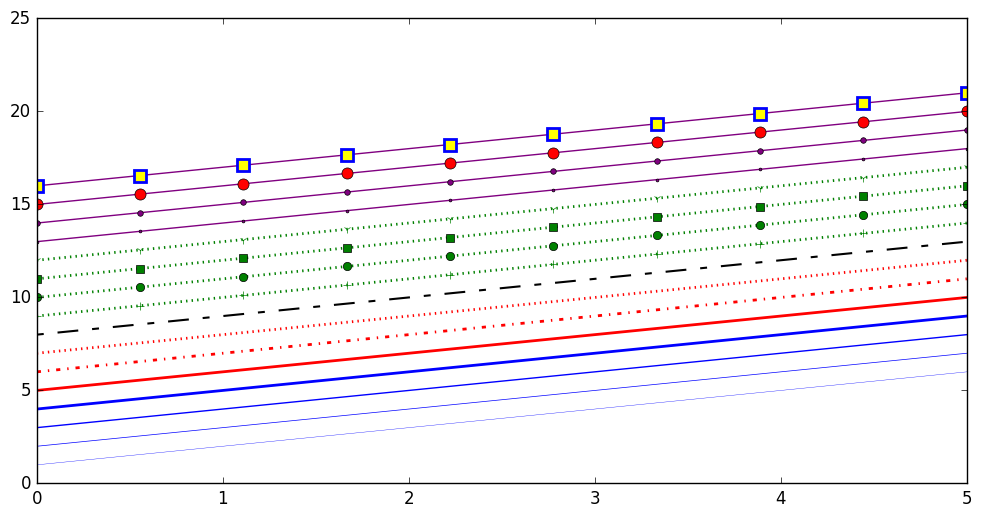

In [84]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible linestyles: http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle
# possible markers: http://matplotlib.org/api/markers_api.html#module-matplotlib.markers
ax.plot(x, x+ 9, color="green", lw=2, ls=':', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls=':', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls=':', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls=':', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

##### 2.2.3 Control over axis apperance
The appearance of the axes is an important aspect of a figure that we often need to modify to make a high quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

**Plot range **

The first thing we might want to configure is the ranges of the axes. We can do it using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges.

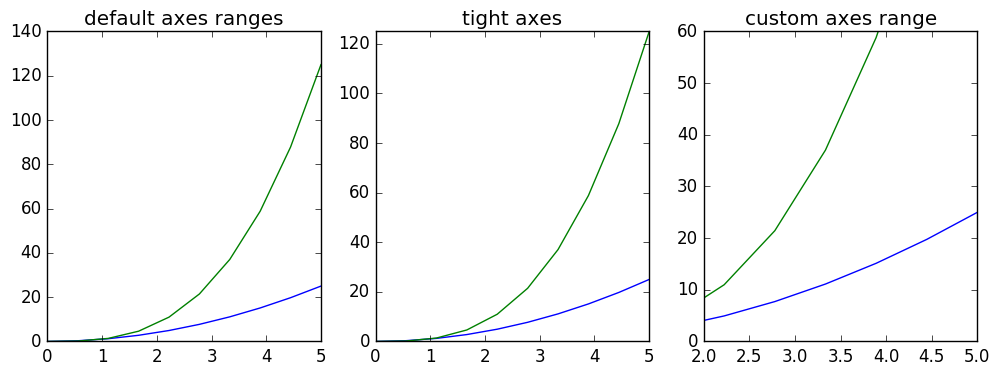

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

**Placement of ticks and custom tick labels**
We can explicitly determine where we want the axis ticks using the `set_xticks` and `set_yticks`, which both takes a list of values for where on the axis the ticks are to be placed. We can also use the functions `set_xticklabels` and `set_yticklabels` to provide a list of custom text labels for each tick location:

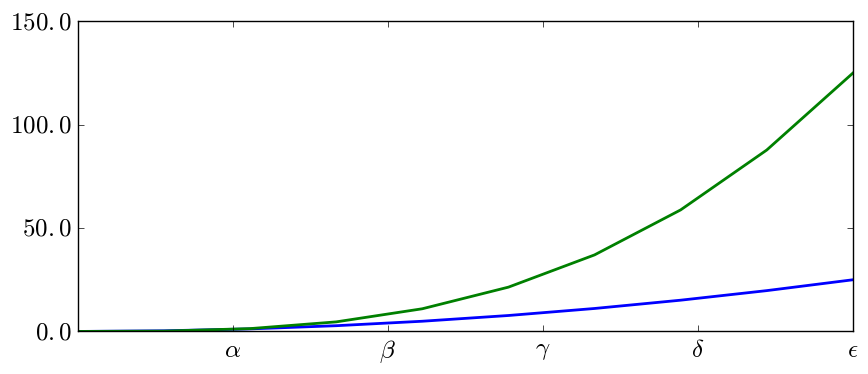

In [86]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

In matplotlib there is a number of more advanced methods for controlling major and minor tick placement, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

**Grid **

Using the `grid` method in the axis object we can turn on and off grid lines. We can also customize the appearence of the gridlines, using the same keywork arguments as we previously used with the `plot` function.

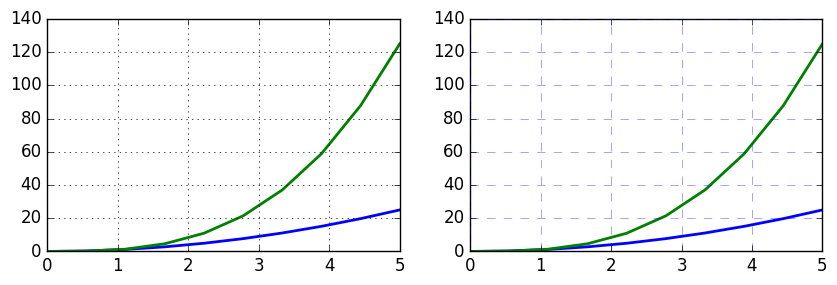

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

**Axis spines **
We can also change the properties of the axis spines:

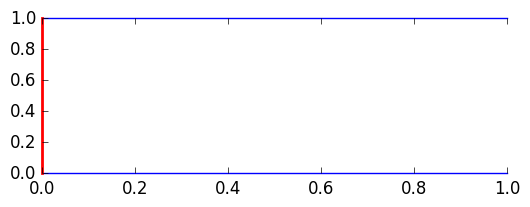

In [88]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

** Twin Axes **

Sometimes it is useful to have dual x or y axes in a figure, for example when plotting curves with differnt units together. Matplotlib supports this with the `twinx` and `twiny` functions:

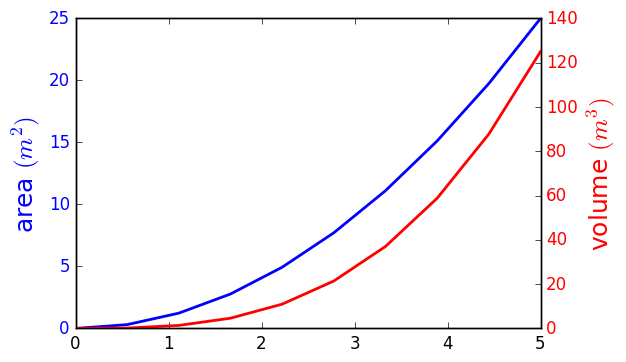

In [89]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes where x and y is zero

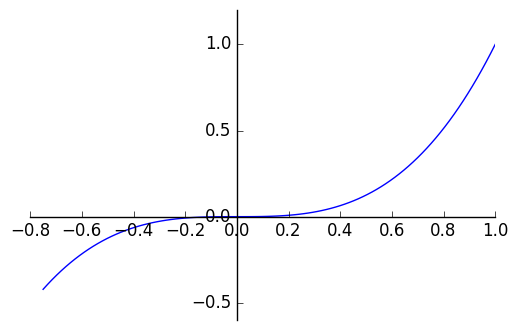

In [90]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

#### 2.2.3. Other 2D plot styles

In addition to the function `plot`, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of avaiable plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [104]:
import numpy as np
n = np.linspace(0, 5)

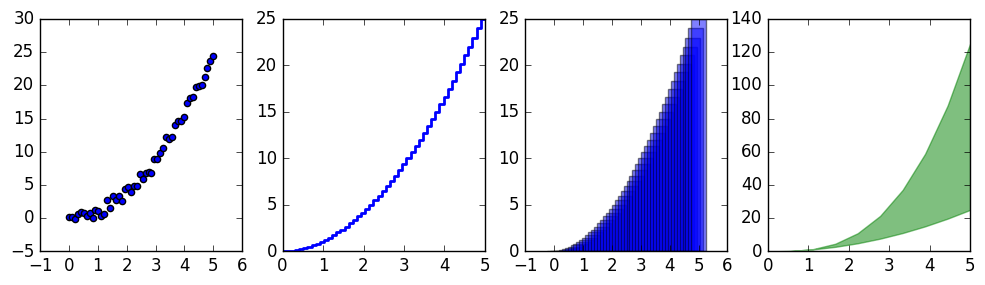

In [105]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(n, n**2 + 0.5*np.random.randn(len(n)))

axes[1].step(n, n**2, lw=2)

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);

##### Bar Charts 

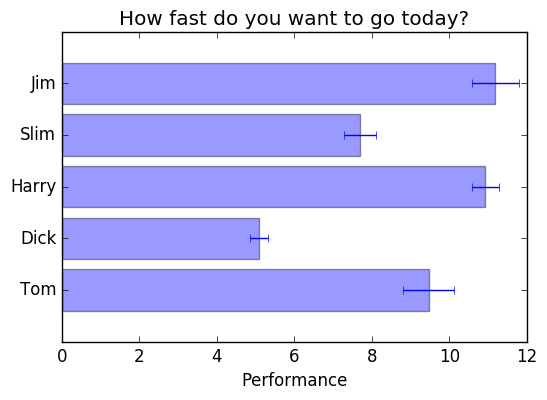

In [106]:
# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Performance')
plt.title('How fast do you want to go today?')

plt.show()

** Bar Charts with Standard Deviation **

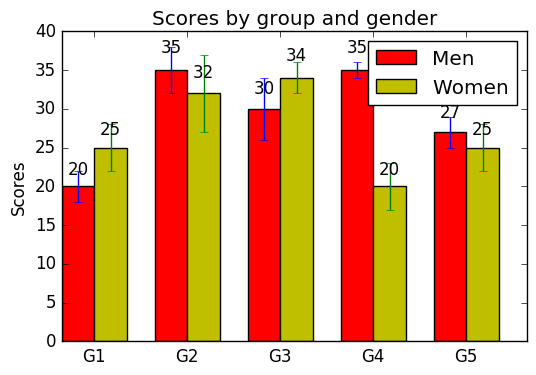

In [107]:
N = 5
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, womenMeans, width, color='y', yerr=womenStd)

# add some
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

** Histogram** 

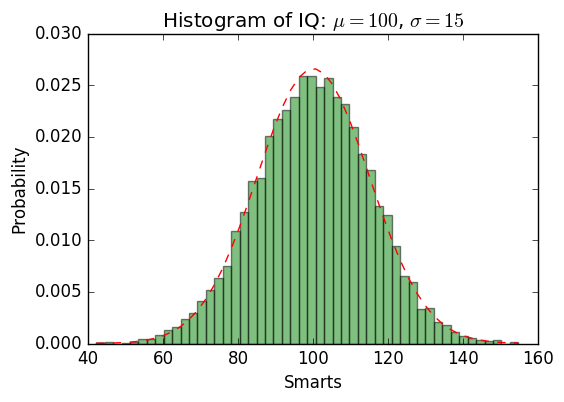

In [111]:
from scipy.stats import norm

# example data
mu = 100 # mean of distribution
sigma = 15 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

##### Pie Charts


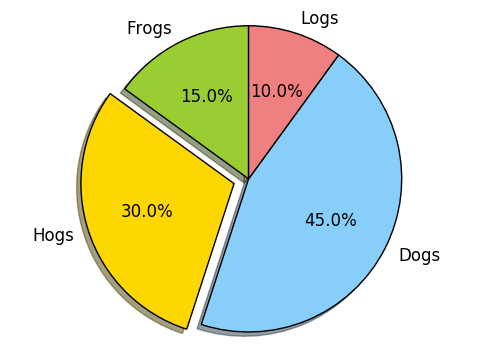

In [112]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

##### Polar Plots

Plot data in polar coordinates as line chart

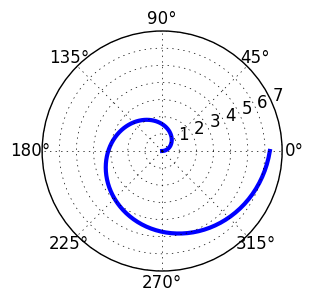

In [116]:
# polar plot using add_axes and polar projection
from math import pi

fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * pi, 100)
ax.plot(t, t, color='blue', lw=3);

** Polar Plot Bar Chart **

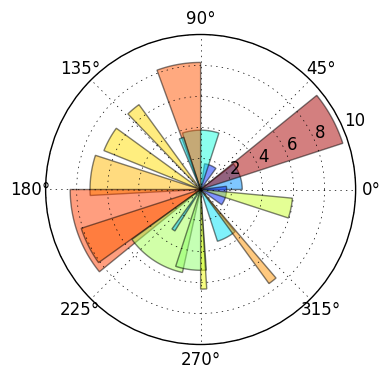

In [117]:
N = 20
#polar bars have 3 channels (excluding color)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N) #height of a bar
width = np.pi / 4 * np.random.rand(N) # opening angle of a bar

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)

plt.show()

##### Box Plots

{'boxes': [<matplotlib.lines.Line2D at 0x7f9b873736d8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9b87233d30>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9b87202da0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9bb0705be0>,
  <matplotlib.lines.Line2D at 0x7f9b87233ba8>]}

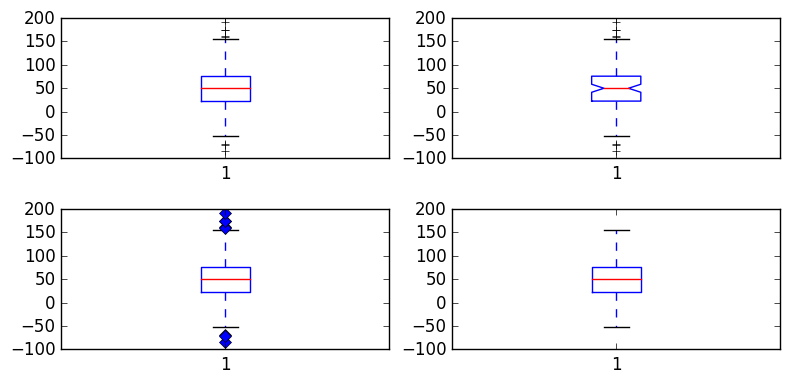

In [122]:
from numpy.random import rand
from numpy import ones

# fake up some data
spread = rand(50) * 100
center = ones(25) * 50
flier_high = rand(10) * 100 + 100
flier_low = rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(8,4))
fig.tight_layout()
# basic plot
axes[0,0].boxplot(data)
# notched plot
axes[0,1].boxplot(data,1)
# change outlier point symbols
axes[1,0].boxplot(data,0,'gD')
# don't show outlier points
axes[1,1].boxplot(data,0,'')



** Scatter Plot with Marign Distribution **



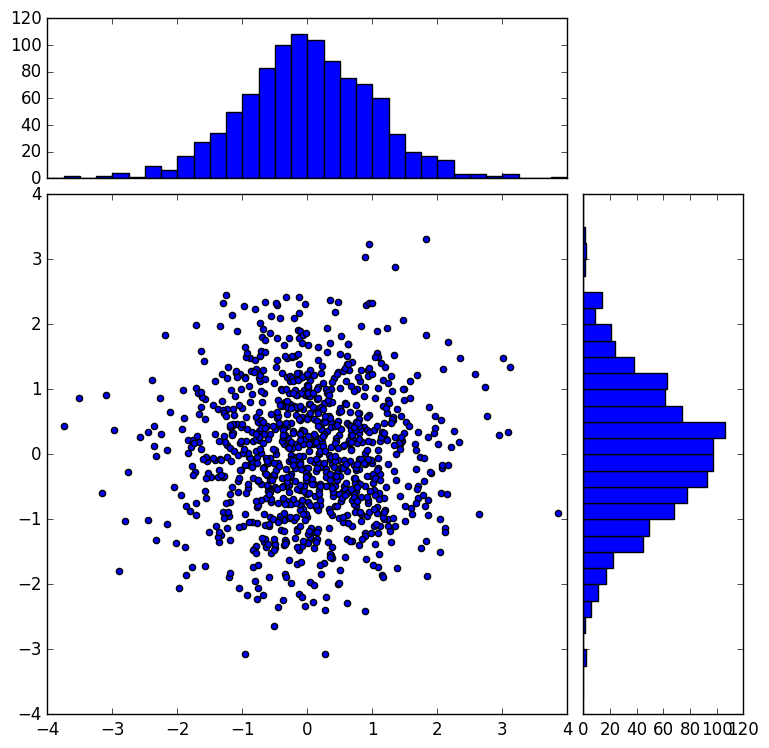

In [123]:
from matplotlib.ticker import NullFormatter

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

nullfmt   = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left+width+0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8,8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max( [np.max(np.fabs(x)), np.max(np.fabs(y))] )
lim = ( int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim( (-lim, lim) )
axScatter.set_ylim( (-lim, lim) )

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

plt.show()

##### Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

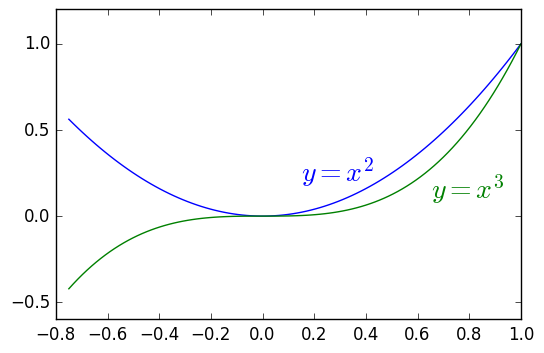

In [124]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

## Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `make_axes` or using sub-figure layout manager such as `subplots` or `subplot2grid` or `gridspec`:

### subplots

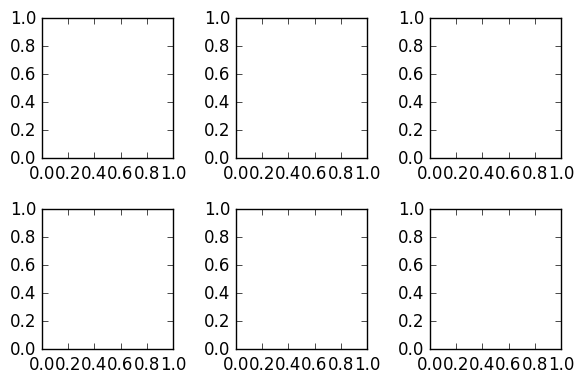

In [125]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

**subplot2grid**

Create subplots of different size

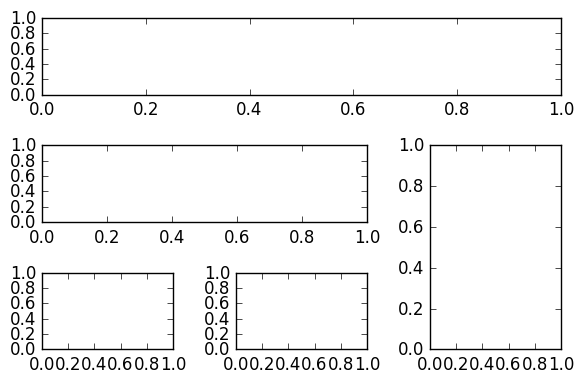

In [126]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

**gridspec**

Similar to `subplots2grid`, but with specifying a more regular layout

In [127]:
import matplotlib.gridspec as gridspec

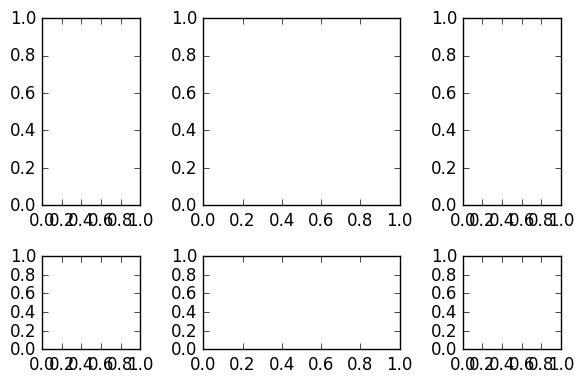

In [128]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

### add_axes

Manually adding axes with `add_axes` is useful for adding insets to figures:

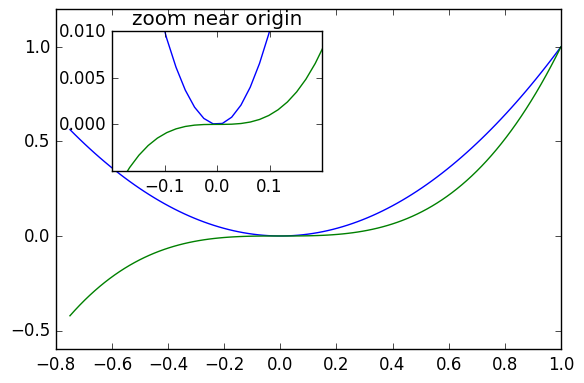

In [129]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

## Backends

Matplotlib has a number of "backends", which are responsible for rendering graphs. The different backends are able to generate graphics with different formats or using different display technologies. There is a distinction between noninteractive backends (such as 'agg', 'svg', 'pdf', etc.) that are only used to generate images files (with for example the `savefig` function), and interactive backends (such as Qt4Agg, GTK, MaxOSX) that can display a GUI window for interactively exploring figures. 

A list of available backends are:

In [150]:
print (matplotlib.rcsetup.all_backends)

['GTK', 'GTKAgg', 'GTKCairo', 'MacOSX', 'Qt4Agg', 'Qt5Agg', 'TkAgg', 'WX', 'WXAgg', 'CocoaAgg', 'GTK3Cairo', 'GTK3Agg', 'WebAgg', 'nbAgg', 'agg', 'cairo', 'emf', 'gdk', 'pdf', 'pgf', 'ps', 'svg', 'template']


The standard backend is called `agg`, and is based on a library for raster graphics and is great for generating raster formats such as PNG.

Normally we don't need to bother with changing the default backend, but sometimes it can be useful to switch to for example the PDF or GTKCairo (if you are using Linux) to produce high-quality vector graphics instead of raster based graphics. 

### Example: Generating SVG with the svg backend

In [151]:
#
# RESTART THE NOTEBOOK: the matplotlib backend can only be selected before pylab is imported!
# 
import matplotlib
matplotlib.use('svg')
import matplotlib.pylab as plt
import numpy
from IPython.display import Image, SVG

/home/zieglerk/local/share/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


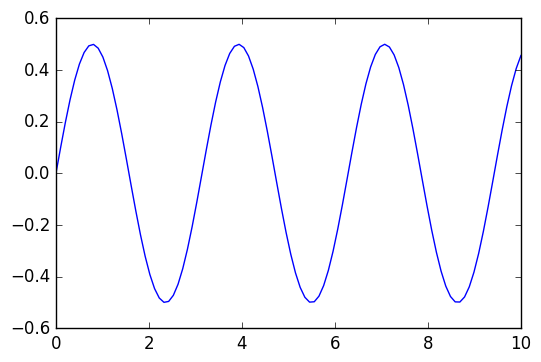

In [152]:
#
# Now we are using the svg backend to produce a SVG vector graphics
#
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.savefig("test.svg")

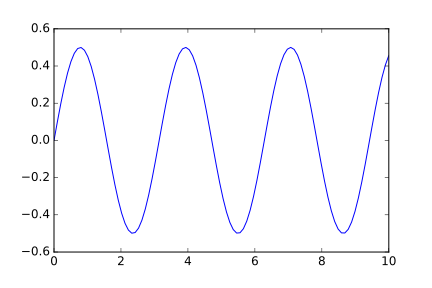

In [153]:
#
# Show the produced SVG file. 
#
SVG(filename="test.svg")

### The IPython notebook inline backend

When we use IPython notebook it is convenient to use a matplotlib backend that outputs the graphics embedded in the notebook file. To activate this backend we add:

    %matplotlib inline

somewhere in the beginning on the notebook.

Formerly, we frequently used 

    %pylab inline

The difference is that `%pylab inline` imports a number of packages into the global address space (scipy, numpy) while `%matplotlib inline` does not important anything, only sets up the inline plotting in the notebook. In new notebooks created for IPython 1.0 I would recommend using `%matplotlib inline`, since it is more tidy and you get better control of which packages are imported and how. Then scipy and numpy can be imported separately if necessary.

### Example: QT interactive backend (this makes more sense in a python script file)

In [154]:
#
# RESTART THE NOTEBOOK: the matplotlib backend can only be selected before pylab is imported!
# 
import matplotlib
matplotlib.use('MacOSX') # or for example Qt4Agg
import matplotlib.pylab as plt
import numpy

/home/zieglerk/local/share/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [ ]:
# Now we are using the Qt4Agg backend open an interactive plot window
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.show()

Note that when we use an interactive backend, we need to call `plt.show()` to make the figure appear on the screen.

### Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery that showcase what kind of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.


## Exercise

Create a line chart where the x-axis is for years, and y-axis is for gdp:
year = [1955, 1965, 1975, 1985, 1995, 2005, 2015]
gdp = [300, 543, 1075, 2862, 5979, 10289, 14958]
Add a title = "nominal GDP" and label to y-axis ="Billions of £"

In [33]:
#write your code here

Execute the next cell to see a sample solution

In [34]:
print("""
from matplotlib import pyplot as plt
year = [1955, 1965, 1975, 1985, 1995, 2005, 2015]
gdp = [300, 543, 1075, 2862, 5979, 10289, 14958]
plt.plot(year, gdp, color='red', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.ylabel("Billions of £")
plt.show()""")


from matplotlib import pyplot as plt
year = [1955, 1965, 1975, 1985, 1995, 2005, 2015]
gdp = [300, 543, 1075, 2862, 5979, 10289, 14958]
plt.plot(year, gdp, color='red', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.ylabel("Billions of £")
plt.show()
